### Implementing K-Means Clustering from Scratch

K-means algorithm is the most popular and yet simplest of all the clustering algorithms. Here is how it works:
1. Select the number of clusters $k$ that you think is the optimal number.
2. Initialize $k$ points as "centroids" randomly within the space of our data.
3. Attribute each observation to its closest centroid.
4. Update the centroids to the center of all the attributed set of observations. 
5. Repeat steps 3 and 4 a fixed number of times or until all of the centroids are stable (i.e. no longer change in step 4).

This algorithm is easy to describe and visualize. Let's take a look.

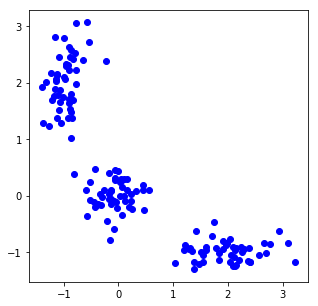

In [137]:
# Scipy has function that takes 2 tuples and return
# calculated distance between them
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import matplotlib.cm as cm

# Let's begin by allocation 3 cluster's points
X = np.zeros((150, 2))

np.random.seed(seed=42)
X[:50, 0] = np.random.normal(loc=0.0, scale=.3, size=50)
X[:50, 1] = np.random.normal(loc=0.0, scale=.3, size=50)

X[50:100, 0] = np.random.normal(loc=2.0, scale=.5, size=50)
X[50:100, 1] = np.random.normal(loc=-1.0, scale=.2, size=50)

X[100:150, 0] = np.random.normal(loc=-1.0, scale=.2, size=50)
X[100:150, 1] = np.random.normal(loc=2.0, scale=.5, size=50)

plt.figure(figsize=(5, 5))
plt.plot(X[:, 0], X[:, 1], 'bo');
plt.show()

In [138]:
def k_means(n=3, X = None, max_iter = 20):

    # Randomly allocate n centroids 
    np.random.seed(seed=42)
    centroids = np.random.normal(loc=0.0, scale=1., size=(n*2))
    centroids = centroids.reshape((n, 2))
    
    cent_history = []
    cent_history.append(centroids)
    plt.figure(figsize=(18, 18))
    #while (np.array_equal(np.around(centroids_prev,decimals=2), np.around(centroids,decimals=2)) == False):

    for i in range(max_iter):
        # Calculating the distance from a point to a centroid
        distances = cdist(X, centroids)
        # Checking what's the closest centroid for the point
        labels = distances.argmin(axis=1)

        # Labeling the point according the point's distance
        centroids = centroids.copy()

        for j in range(n):
            centroids[j, :] = np.mean(X[labels == j, :], axis=0)
        #print(cent_history)
        cent_history.append(centroids)

        plt.subplot(5, 5, i+1)
        col = ['bo', 'go', 'ro', 'co', 'mo', 'yo', 'bs', 'gs', 'rs', 'cs', 'ms', 'ys']
        for k in range(n):
            plt.plot(X[labels == k, 0], X[labels == k, 1], col[k], alpha = 0.4)
        plt.plot(cent_history[i][:, 0], cent_history[i][:, 1], 'kX')
        plt.legend(loc=0)
        plt.title('Step {:}'.format(i + 1));
        if i> 0:
            print(cent_history[i], cent_history[i-1])
        if((i >0) and (np.array_equal(np.around(cent_history[i],decimals=2), np.around(cent_history[i-1],decimals=2)) == True)):
            
            break
    plt.show()
    
        

C:\Users\Priyaranjan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


[[ 1.3027262  -0.67228627]
 [-0.82165365  2.53938863]
 [-0.16016846 -0.07401838]
 [ 2.44621149 -0.92872222]
 [-0.86738748  1.38449484]
 [-0.36864945 -0.57239276]
 [ 1.31888876 -1.22221394]] [[ 0.49671415 -0.1382643 ]
 [ 0.64768854  1.52302986]
 [-0.23415337 -0.23413696]
 [ 1.57921282  0.76743473]
 [-0.46947439  0.54256004]
 [-0.46341769 -0.46572975]
 [ 0.24196227 -1.91328024]]
[[ 1.54322396 -0.77551425]
 [-0.91289561  2.3856875 ]
 [-0.06703294  0.0601317 ]
 [ 2.3084848  -0.98859551]
 [-1.04695116  1.57625683]
 [-0.26019007 -0.54502767]
 [ 1.45851531 -1.08265905]] [[ 1.3027262  -0.67228627]
 [-0.82165365  2.53938863]
 [-0.16016846 -0.07401838]
 [ 2.44621149 -0.92872222]
 [-0.86738748  1.38449484]
 [-0.36864945 -0.57239276]
 [ 1.31888876 -1.22221394]]
[[ 1.70255939 -0.79967543]
 [-0.89713994  2.40032485]
 [-0.0622099   0.07448059]
 [ 2.32243878 -0.99484622]
 [-1.05893342  1.5949029 ]
 [-0.23197712 -0.45092452]
 [ 1.38820086 -1.0702376 ]] [[ 1.54322396 -0.77551425]
 [-0.91289561  2.385687

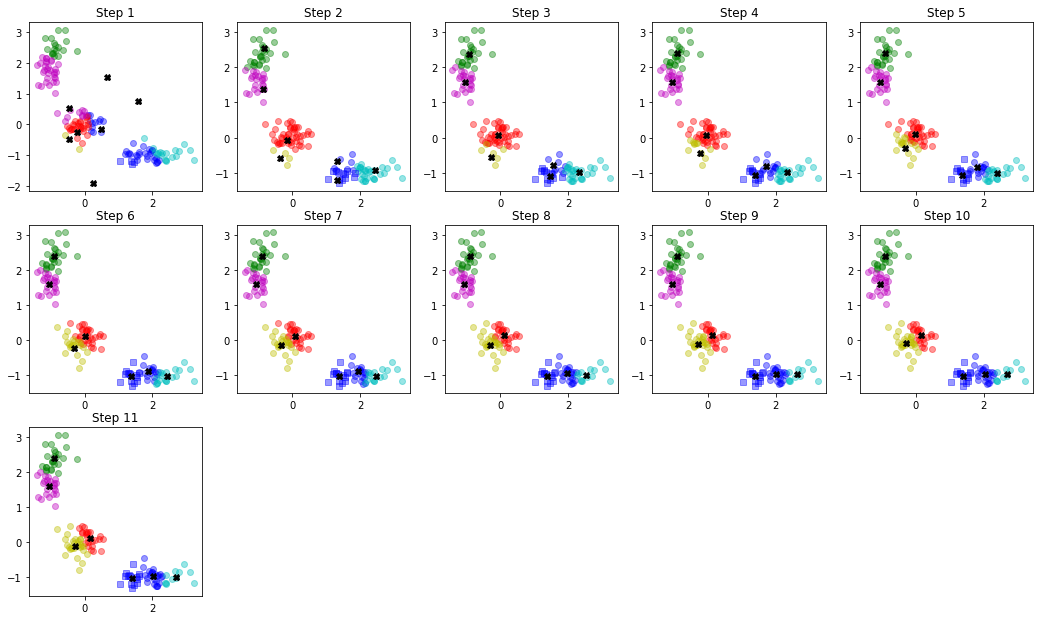

In [140]:
k_means(7, X)

False